# MobileNet - Test

In [1]:
from tensorflow.keras import layers, models, applications
from tensorflow.keras.applications import mobilenet
from tensorflow.keras.utils import Sequence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

import cv2


In [2]:
# @title 모델 생성
model = applications.MobileNetV2()
model.summary()


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [3]:
base_model = applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights=None
)

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(1024, activation='relu', kernel_initializer='he_normal')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(11, activation='softmax')(x)

model = models.Model(base_model.input, output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,581,003 (13.66 MB)

 Trainable params: 3,546,891 (13.53 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [4]:
# @title 훈련 데이터 준비

# https://drive.google.com/file/d/167q4k2tQJmyiSnlUGVFJL8ao4LHLDmN3/view?usp=sharing

import gdown, zipfile, os

file_id = '167q4k2tQJmyiSnlUGVFJL8ao4LHLDmN3'
output = 'file.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

output_dir = 'new_cloud'
os.makedirs(output_dir, exist_ok=True)

with zipfile.ZipFile(output, 'r') as z:
  z.extractall(output_dir)

Downloading...
From (original): https://drive.google.com/uc?id=167q4k2tQJmyiSnlUGVFJL8ao4LHLDmN3
From (redirected): https://drive.google.com/uc?id=167q4k2tQJmyiSnlUGVFJL8ao4LHLDmN3&confirm=t&uuid=eba93eb7-b6c0-46a2-9faf-97e27c282726
To: /content/file.zip
100%|██████████| 56.4M/56.4M [00:00<00:00, 143MB/s]


In [5]:
# @title 훈련 메타데이터 생성

def load_data(base_dir='new_cloud'):
  images_path = []
  labels = []
  class_names = []

  train_base = os.path.join(base_dir, 'new_cloud')

  for class_name in os.listdir(train_base):
    class_name_path = os.path.join(train_base, class_name)

    # 디렉토리인 경우만
    if os.path.isdir(class_name_path):
      for image_name in os.listdir(class_name_path):
        image_path = os.path.join(class_name_path, image_name)
        images_path.append(image_path)
        labels.append(class_name)

  return np.array(images_path), np.array(labels)

images_path, labels = load_data()
print(images_path.shape, labels.shape)
print(images_path[:5], labels[:5])
type(images_path), type(labels)

(1232,) (1232,)
['new_cloud/new_cloud/Ns/Ns-N228.jpg' 'new_cloud/new_cloud/Ns/Ns-N294.jpg'
 'new_cloud/new_cloud/Ns/Ns-N277.jpg' 'new_cloud/new_cloud/Ns/Ns-N016.jpg'
 'new_cloud/new_cloud/Ns/Ns-N300.jpeg'] ['Ns' 'Ns' 'Ns' 'Ns' 'Ns']


(numpy.ndarray, numpy.ndarray)

In [6]:
# @title train/val 데이터 분리
from sklearn.model_selection import train_test_split

train_images_path, test_images_path, train_labels, test_labels = train_test_split(images_path, labels, test_size = 0.2, random_state = 0)
train_images_path, val_images_path, train_labels, val_labels = train_test_split(train_images_path, train_labels, test_size = 0.4, random_state = 0)

# print(train_images_path.shape, train_labels.shape, val_images_path.shape, val_labels.shape)
print(train_images_path.shape, train_labels.shape, val_images_path.shape, val_labels.shape, test_images_path.shape, test_labels.shape)


(591,) (591,) (394,) (394,) (247,) (247,)


In [8]:
# @title 훈련 데이터 증강 및 저장

import os
import cv2
import numpy as np
import albumentations as A

# 증강 구성
augmentor = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=90, p=0.5),
    A.HorizontalFlip(p=0.3),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.4)
])

augment_times = 3  # 증강 횟수
save_dir = "new_cloud/new_cloud_aug"  # 저장 디렉토리
target_size = (224, 224)  # 고정 크기
os.makedirs(save_dir, exist_ok=True)

# 증강 데이터 생성 및 저장
augmented_images = []
augmented_labels = []

for img_path, label in zip(train_images_path, train_labels):
    # 원본 이미지 읽기
    image = cv2.imread(img_path)
    if image is None:
        print(f"Error reading image: {img_path}")
        continue

    # 리사이즈
    image = cv2.resize(image, target_size)

    # 원본 이미지 저장
    label_dir = os.path.join(save_dir, str(label))
    os.makedirs(label_dir, exist_ok=True)
    original_image_path = os.path.join(label_dir, os.path.basename(img_path))
    cv2.imwrite(original_image_path, image)

    # 원본 추가
    augmented_images.append(image)
    augmented_labels.append(label)

    # 증강 데이터 생성 및 저장
    for i in range(augment_times):
        aug_image = augmentor(image=image)['image']
        aug_image = cv2.resize(aug_image, target_size)  # 고정 크기로 리사이즈
        aug_image_name = f"aug_{i}_{os.path.basename(img_path)}"
        aug_image_path = os.path.join(label_dir, aug_image_name)
        cv2.imwrite(aug_image_path, aug_image)

        # 증강 이미지 추가
        augmented_images.append(aug_image)
        augmented_labels.append(label)

# NumPy 배열로 변환
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# 출력 확인
print(f"Augmented images shape: {augmented_images.shape}")
print(f"Augmented labels shape: {augmented_labels.shape}")



/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Augmented images shape: (2364, 224, 224, 3)
Augmented labels shape: (2364,)


In [9]:
# @title 훈련AUG 메타데이터 생성
from sklearn.model_selection import train_test_split

def load_data(base_dir='new_cloud'):
  augmented_images = []
  augmented_labels = []
  class_names = []

  train_base = os.path.join(base_dir, 'new_cloud_aug')

  for class_name in os.listdir(train_base):
    class_name_path = os.path.join(train_base, class_name)

    # 디렉토리인 경우만
    if os.path.isdir(class_name_path):
      for image_name in os.listdir(class_name_path):
        image_path = os.path.join(class_name_path, image_name)
        augmented_images.append(image_path)
        augmented_labels.append(class_name)

  return np.array(augmented_images), np.array(augmented_labels)

images, labels = load_data()
print(images.shape, labels.shape)
type(images), type(labels)


(2364,) (2364,)


(numpy.ndarray, numpy.ndarray)

In [10]:
# 증강후
train_aug_images=images
train_aug_labels=labels
train_aug_images.shape, train_aug_labels.shape

((2364,), (2364,))

In [7]:
# @title CloudSequence 생성
class CloudSequence(Sequence):
    def __init__(self, images, labels, batch_size=32,
                 target_size=(224, 224), preprocess_function=None):
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.target_size = target_size
        self.preprocess_function = preprocess_function  # 스케일링 함수
        print(self.images.shape)

    def __len__(self):
        # 데이터 수 = 원본 이미지 수 × 증강 횟수
        return int(np.ceil(self.images.shape[0]/ self.batch_size))

    def __getitem__(self, index):
        start = index * self.batch_size
        stop = (index + 1) * self.batch_size

        # 증강을 반복하여 데이터 생성
        batch_images = []
        batch_labels = []
        for img_path, label in zip(self.images[start:stop], self.labels[start:stop]):
            image = cv2.imread(img_path)
            image = cv2.resize(image, self.target_size)
            batch_images.append(image)
            batch_labels.append(label)

        # 최종 배치 반환
        batch_images = np.array(batch_images)
        batch_labels = np.array(batch_labels)
        return batch_images , batch_labels

In [12]:
# @title 테스트 데이터 불러오기
# https://drive.google.com/file/d/1El9QtUj3qYlOXLMZdq4GPKClgcxEI1XM/view?usp=sharing

import gdown, zipfile, os

file_id = '1El9QtUj3qYlOXLMZdq4GPKClgcxEI1XM'
output = 'file.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

output_dir = 'test_cloud'
os.makedirs(output_dir, exist_ok=True)

with zipfile.ZipFile(output, 'r') as z:
  z.extractall(output_dir)

Downloading...
From: https://drive.google.com/uc?id=1El9QtUj3qYlOXLMZdq4GPKClgcxEI1XM
To: /content/file.zip
100%|██████████| 14.9M/14.9M [00:00<00:00, 56.6MB/s]


In [13]:
# @title 테스트 메타데이터 생성
from sklearn.model_selection import train_test_split

def load_data(base_dir='test_cloud'):
  test_images = []
  test_labels = []
  class_names = []

  train_base = os.path.join(base_dir, 'sample_test_cloud_img', 'sample_test_cloud_img', 'test_cloud_img')

  for class_name in os.listdir(train_base):
    class_name_path = os.path.join(train_base, class_name)

    # 디렉토리인 경우만
    if os.path.isdir(class_name_path):
      for image_name in os.listdir(class_name_path):
        image_path = os.path.join(class_name_path, image_name)
        test_images.append(image_path)
        test_labels.append(class_name)

  return np.array(test_images), np.array(test_labels)

test_images_path, test_labels = load_data()
print(test_images_path.shape, test_labels.shape)
print(test_images_path, test_labels)
type(test_images_path), type(test_labels)


(37,) (37,)
['test_cloud/sample_test_cloud_img/sample_test_cloud_img/test_cloud_img/Ns/Ns_5.jpeg'
 'test_cloud/sample_test_cloud_img/sample_test_cloud_img/test_cloud_img/Ns/Ns_3.jpg'
 'test_cloud/sample_test_cloud_img/sample_test_cloud_img/test_cloud_img/Ns/Ns_1.jpg'
 'test_cloud/sample_test_cloud_img/sample_test_cloud_img/test_cloud_img/Ns/Ns_6.jpeg'
 'test_cloud/sample_test_cloud_img/sample_test_cloud_img/test_cloud_img/Ns/Ns_4.jpeg'
 'test_cloud/sample_test_cloud_img/sample_test_cloud_img/test_cloud_img/Ns/Ns_2.jpg'
 'test_cloud/sample_test_cloud_img/sample_test_cloud_img/test_cloud_img/Sc/Sc_6.jpg'
 'test_cloud/sample_test_cloud_img/sample_test_cloud_img/test_cloud_img/Sc/Sc_3.jpg'
 'test_cloud/sample_test_cloud_img/sample_test_cloud_img/test_cloud_img/Sc/Sc_4.jpg'
 'test_cloud/sample_test_cloud_img/sample_test_cloud_img/test_cloud_img/Sc/Sc_1.jpg'
 'test_cloud/sample_test_cloud_img/sample_test_cloud_img/test_cloud_img/Sc/Sc_5.jpeg'
 'test_cloud/sample_test_cloud_img/sample_test_cl

(numpy.ndarray, numpy.ndarray)

In [14]:
# train_images=[]
# for i in range(len(train_images_path)):

#   train_image = cv2.imread(train_images_path[i])

#   train_image = cv2.resize(train_image, (224,224))
#   train_image = np.array(train_image)
#   train_images.append(train_image)

# train_images=np.array(train_images)

In [15]:
# val_images=[]
# for i in range(len(val_images_path)):

#   val_image = cv2.imread(val_images_path[i])

#   val_image = cv2.resize(val_image, (224,224))
#   val_image = np.array(val_image)
#   val_images.append(val_image)

# val_images=np.array(val_images)

In [8]:
# print(train_aug_images.shape, train_aug_labels.shape)  # 증강 O
print(train_images_path.shape, train_labels.shape)  # 증강 X
print(val_images_path.shape, val_labels.shape)
print(test_images_path.shape, test_labels.shape)

(591,) (591,)
(394,) (394,)
(247,) (247,)


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# 증강 O
# train_aug_labels = label_encoder.fit_transform(train_aug_labels)
# train_aug_labels = np.array(train_aug_labels, dtype='int32')
# print(np.unique(train_aug_labels))
# print(train_aug_labels.dtype)

# 증강 X
train_labels = label_encoder.fit_transform(train_labels)
train_labels = np.array(train_labels, dtype='int32')
print(np.unique(train_labels))
print(train_labels.dtype)

val_labels = label_encoder.fit_transform(val_labels)
val_labels = np.array(val_labels, dtype='int32')
print(np.unique(val_labels))
print(val_labels.dtype)

test_labels = label_encoder.fit_transform(test_labels)
test_labels = np.array(test_labels, dtype='int32')
print(np.unique(test_labels))
print(test_labels.dtype)


[0 1 2 3 4 5 6 7 8 9]
int32
[0 1 2 3 4 5 6 7 8 9]
int32
[0 1 2 3 4 5 6 7 8 9]
int32


In [10]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# train_seq = CloudSequence(train_aug_images, train_aug_labels, preprocess_function = preprocess_input)  # 증강 O
train_seq = CloudSequence(train_images_path, train_labels, preprocess_function = preprocess_input)  # 증강 X
val_seq = CloudSequence(val_images_path, val_labels, preprocess_function = preprocess_input)
test_seq = CloudSequence(test_images_path, test_labels, preprocess_function = preprocess_input)


(591,)
(394,)
(247,)


In [11]:
# print("train 라벨 값 확인:", np.unique(train_aug_labels))  # 증강 O
print("train 라벨 값 확인:", np.unique(train_labels))  # 증강 X
print("val 라벨 값 확인:", np.unique(val_labels))
print("test 라벨 값 확인:", np.unique(test_labels))

train 라벨 값 확인: [0 1 2 3 4 5 6 7 8 9]
val 라벨 값 확인: [0 1 2 3 4 5 6 7 8 9]
test 라벨 값 확인: [0 1 2 3 4 5 6 7 8 9]


In [12]:
# @title 모델 학습
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001), # 'adam' -> Adam() 실제 객체로 변환후 학습이 진행되고 있다?
    metrics=['accuracy']
)

early_stopping_cb = EarlyStopping(patience=6, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau_cb = ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)


# 학습
history = model.fit(
    train_seq,
    epochs=30,
    batch_size=32,
    validation_data=val_seq,
    callbacks=[early_stopping_cb, reduce_lr_on_plateau_cb]
    )



Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.1521 - loss: 2.9443 - val_accuracy: 0.0914 - val_loss: 2.3896 - learning_rate: 0.0010
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - accuracy: 0.2973 - loss: 1.9998 - val_accuracy: 0.1421 - val_loss: 2.3810 - learning_rate: 0.0010
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.4040 - loss: 1.7026 - val_accuracy: 0.1421 - val_loss: 2.3689 - learning_rate: 0.0010
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - accuracy: 0.4837 - loss: 1.4607 - val_accuracy: 0.1421 - val_loss: 2.3525 - learning_rate: 0.0010
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.4995 - loss: 1.3860 - val_accuracy: 0.1421 - val_loss: 2.3353 - learning_rate: 0.0010
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.5525 - loss: 1.2663 - val_accuracy: 0.1421 - val_loss: 2.3269 - learning_rate: 0.0010
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.6556 - loss: 1.0149 - val_accuracy

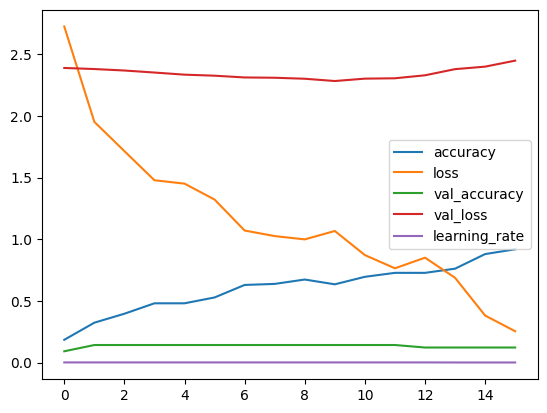

2/8 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.1172 - loss: 2.2692 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 774ms/step - accuracy: 0.1510 - loss: 2.2777
loss: 2.2698, accuracy: 0.1781


In [13]:

# 학습결과 시각화
pd.DataFrame(history.history).plot()
plt.show()

# 평가
loss, accuracy = model.evaluate(test_seq)
print(f'loss: {loss:.4f}, accuracy: {accuracy:.4f}')


In [ ]:
# test_images=[]
# for i in range(len(test_images_path)):

#   test_image = cv2.imread(test_images_path[i])

#   test_image = cv2.resize(test_image, (224,224))
#   test_image = np.array(test_image)
#   test_images.append(test_image)

# print(np.array(test_images).shape)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step
(247, 11)


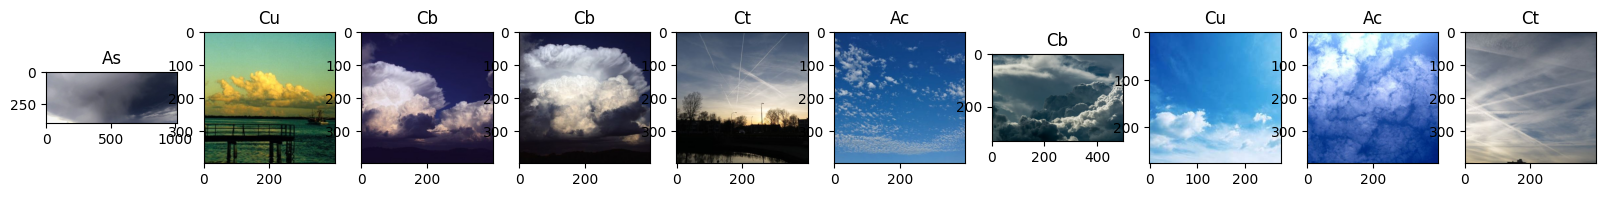

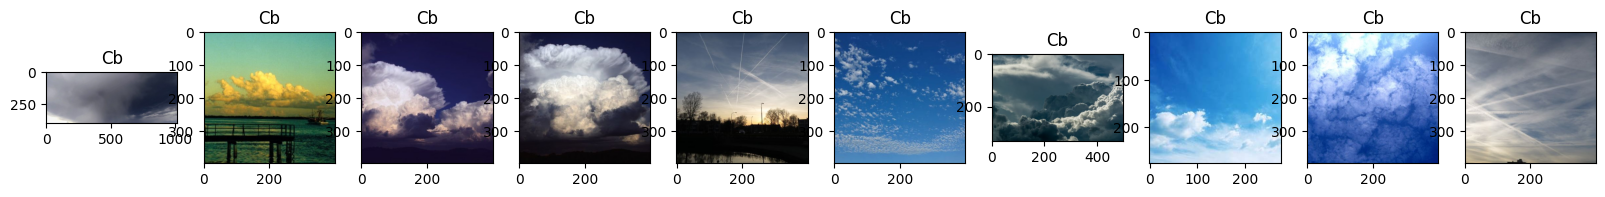

In [14]:
# @title 모델 예측
import cv2
pred_proba = model.predict(test_seq)
print(pred_proba.shape)

class_names = np.array(['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Ct', 'Cu', 'Ns', 'Sc'])

def show_images(images, labels, nrows=1,ncols = 10):
  fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, 6))
  for j,(image_path, label) in enumerate(zip(images,labels)):
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[j].imshow(image)  # ndarray 전달해서 이미지 출력
    class_name = class_names[label]
    ax[j].set_title(class_name)

  plt.show()

pred = np.argmax(pred_proba, axis = 1)

show_images(test_images_path[20:30],test_labels[20:30])
show_images(test_images_path[20:30], pred[20:30])

In [ ]:
model.save('best_cloud_mobilenet_new_images_final.keras')